<a href="https://colab.research.google.com/github/HromovAndrey/II_Homework_mood_7_part_1/blob/homework/%D0%94%D0%97_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df)

In [41]:
type(data)

pandas.core.frame.DataFrame

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [43]:
kmeans.inertia_

952.8051227943891

In [44]:
import matplotlib.pyplot as plt

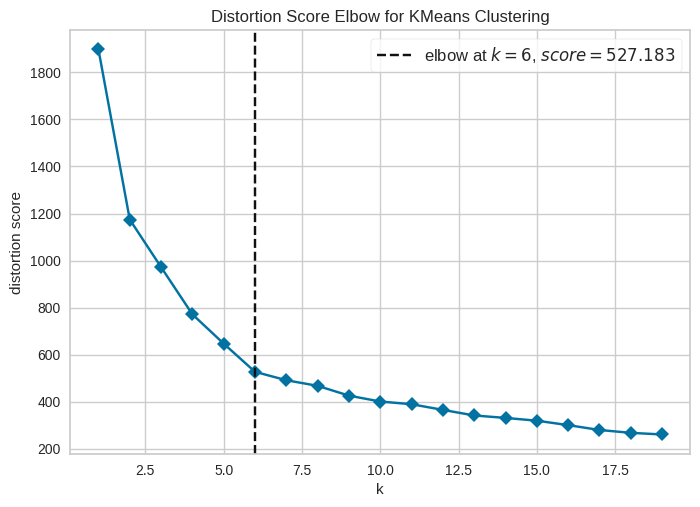

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


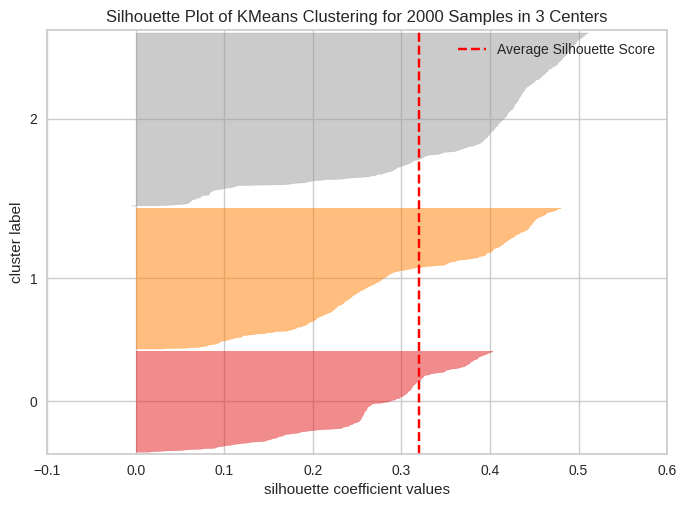

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(3))
visualizer.fit(data)
visualizer.show()

In [48]:
kmeans = KMeans(3)

kmeans.fit(data)

df['cluster_id'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0


In [49]:
df['cluster_id'].value_counts()

,count
cluster_id,
1,834
0,679
2,487


In [50]:
results = df.groupby(by='cluster_id').mean()

results

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,,
0,1.000007e+08,0.000000,0.234168,38.824742,0.942563,143552.690722,1.259205,1.508100
1,1.000011e+08,0.882494,1.000000,33.075540,1.249400,114405.673861,0.709832,0.505995
2,1.000012e+08,0.365503,0.000000,36.696099,0.809035,100661.661191,0.357290,0.065708


<Axes: xlabel='cluster_id'>

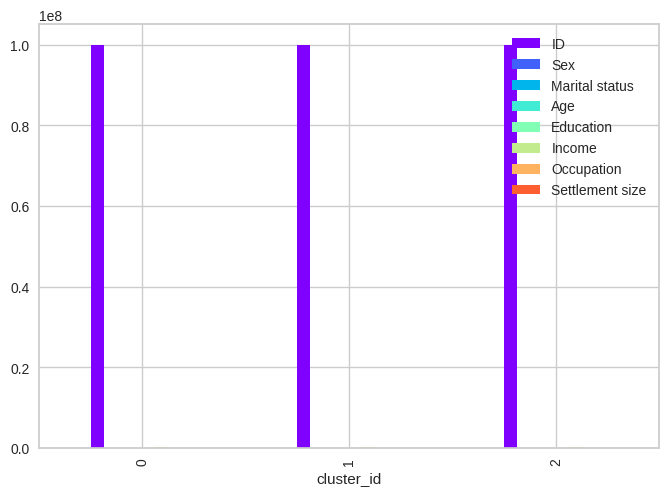

In [51]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

In [52]:
!pip install -q kneed

0.1481610106932744


<Figure size 500x500 with 0 Axes>

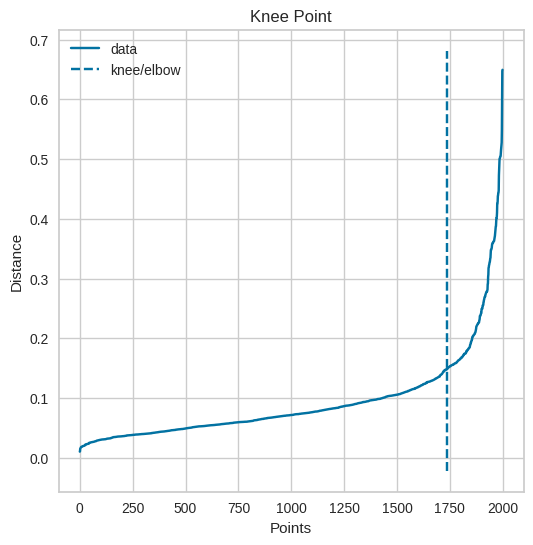

In [53]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(data)
distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,-1]

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


print(distances[knee.knee])

In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=3)

dbscan.fit(data)


DBSCAN(eps=1, min_samples=3)

In [55]:
df['cluster_id'] = dbscan.labels_

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0


In [56]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,829
1,736
2,257
3,178


In [57]:
results = df.groupby(by='cluster_id').mean()

results

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,,
0,1.000008e+08,0.0,0.0,39.085645,0.790109,129262.819059,0.927624,0.977081
1,1.000011e+08,1.0,1.0,33.192935,1.262228,116442.165761,0.741848,0.569293
2,1.000009e+08,0.0,1.0,33.968872,1.268482,122976.723735,0.933852,0.918288
3,1.000016e+08,1.0,0.0,35.146067,0.932584,97997.241573,0.370787,0.073034


<Axes: xlabel='cluster_id'>

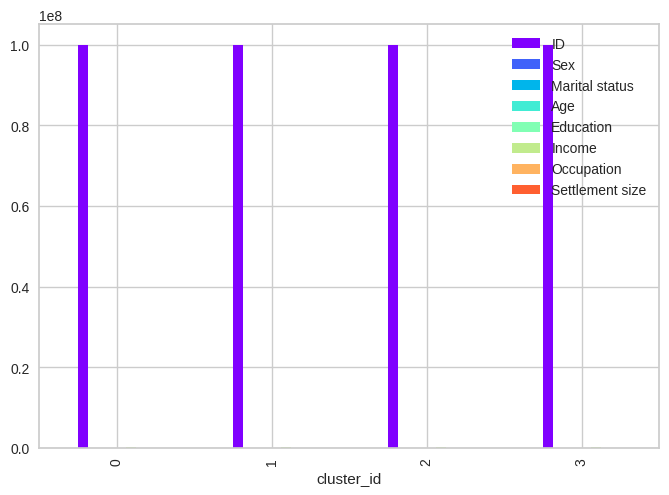

In [58]:

import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)
